<a href="https://colab.research.google.com/github/hazerr/mlzoomcamp/blob/main/homework4_mlzoomcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [15]:
features = ['Make', 'Model', 'Year', 'Engine HP','Engine Cylinders', 'Transmission Type', 'Vehicle Style','highway MPG', 'city mpg', 'MSRP']

In [16]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [17]:
df_refined = df[features]

In [18]:
df_refined

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [19]:
df_refined.columns = df_refined.columns.str.lower().str.replace(' ', '_')

In [20]:
df_refined

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [21]:
df_refined.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [22]:
df_refined = df_refined.fillna(0)

In [23]:
average_price = df_refined['msrp'].mean()
df_refined['above_average'] = (df_refined['msrp'] >= average_price).astype(int)
df_refined = df_refined.drop('msrp', axis=1)

In [12]:
df_refined

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [24]:
from sklearn.model_selection import train_test_split

X = df_refined.drop('above_average', axis=1)
y = df_refined['above_average']  # Target variable


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)


print("Training set size:", X_train.shape[0])
print("Validation set size:", X_valid.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 7148
Validation set size: 2383
Test set size: 2383


In [26]:
auc_results = pd.DataFrame(columns=['Variable', 'ROC AUC'])

# Question 1: ROC AUC feature importance

In [27]:
from sklearn.metrics import roc_auc_score

variables = []
roc_aucs = []

for column in X_train.select_dtypes(include=['number']):

    auc = roc_auc_score(y_train, X_train[column])


    if auc < 0.5:

        inverted_auc = roc_auc_score(y_train, -X_train[column])


        variables.append('-' + column)
        roc_aucs.append(inverted_auc)
    else:

        variables.append(column)
        roc_aucs.append(auc)

auc_results = pd.DataFrame({'Variable': variables, 'ROC AUC': roc_aucs})

print(auc_results)

           Variable   ROC AUC
0              year  0.694302
1         engine_hp  0.915900
2  engine_cylinders  0.768275
3      -highway_mpg  0.633369
4         -city_mpg  0.672327


In [29]:
dv = DictVectorizer(sparse=False)
train_dict = X_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

# Question 2: Training the model

In [31]:
val_dict = X_valid.to_dict(orient='records')
X_valid = dv.transform(val_dict)

y_pred = model.predict_proba(X_valid)[:, 1]
auc_valid = roc_auc_score(y_valid, y_pred)

In [32]:
np.round(auc_valid,3)

0.982

In [33]:
y_pred

array([1.76912097e-03, 4.23735524e-02, 2.63762588e-05, ...,
       2.91660555e-01, 1.12842437e-03, 5.60686057e-01])

In [34]:
y_pred.min()

4.0230351079535844e-06

In [35]:
y_pred.max()

0.9999999998117821

In [36]:
actual_positive = (y_valid == 1)
actual_negative = (y_valid == 0)

In [37]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [38]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [39]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1672,   65],
       [  77,  569]])

In [40]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.7 , 0.03],
       [0.03, 0.24]])

In [41]:
p = tp / (tp + fp)
p

0.8974763406940063

In [42]:
r = tp / (tp + fn)
r

0.8808049535603715

In [ ]:
tpr = tp / (tp + fn)
tpr

In [44]:
fpr = fp / (fp + tn)
fpr

0.03742084052964882

In [45]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_valid == 1)
    actual_negative = (y_valid == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    # Calculate precision and recall, handling the case when (tp + fp) is zero
    if tp + fp == 0:
        p = 0
    else:
        p = tp / (tp + fp)

    r = tp / (tp + fn)

    scores.append((t, tp, fp, fn, tn, p, r))

In [46]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn','p', 'r']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

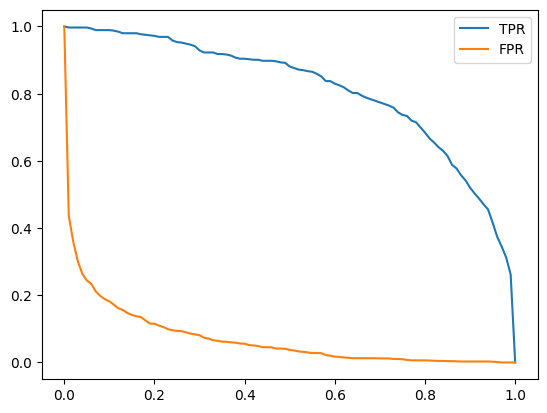

In [47]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [48]:
df_scores

,threshold,tp,fp,fn,tn,p,r,tpr,fpr
0,0.00,646,1737,0,0,0.271087,1.000000,1.000000,1.000000
1,0.01,644,757,2,980,0.459672,0.996904,0.996904,0.435809
2,0.02,644,624,2,1113,0.507886,0.996904,0.996904,0.359240
3,0.03,644,524,2,1213,0.551370,0.996904,0.996904,0.301670
4,0.04,644,458,2,1279,0.584392,0.996904,0.996904,0.263673
...,...,...,...,...,...,...,...,...,...
96,0.96,242,2,404,1735,0.991803,0.374613,0.374613,0.001151
97,0.97,223,0,423,1737,1.000000,0.345201,0.345201,0.000000
98,0.98,202,0,444,1737,1.000000,0.312693,0.312693,0.000000
99,0.99,169,0,477,1737,1.000000,0.261610,0.261610,0.000000


Text(0.5, 0, 'Treshold')

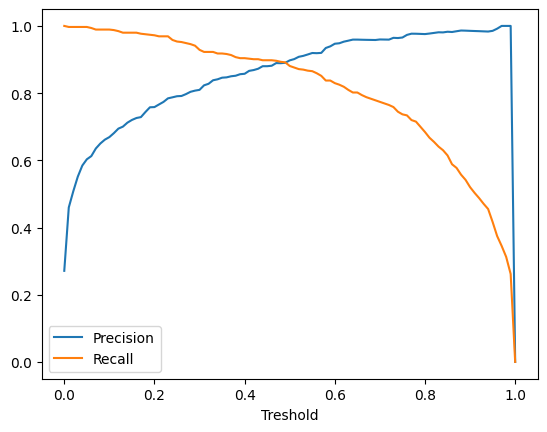

In [49]:
plt.plot(df_scores.threshold, df_scores['p'], label='Precision')
plt.plot(df_scores.threshold, df_scores['r'], label='Recall')
plt.legend()
plt.xlabel('Treshold')

In [50]:
intersection_threshold = thresholds[np.argwhere(np.diff(np.sign(np.array(df_scores['p']) - np.array(df_scores['r']))))[0][0]]

In [51]:
intersection_threshold

0.49

# Question 4

In [52]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_valid == 1)
    actual_negative = (y_valid == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    # Calculate precision and recall, handling the case when (tp + fp) is zero
    if tp + fp == 0:
        p = 0
    else:
        p = tp / (tp + fp)
        f1 = 2* (p*r/(p+r))

    r = tp / (tp + fn)

    scores.append((t, tp, fp, fn, tn, p, r, f1))

In [53]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn','p', 'r','f1']
df_scores = pd.DataFrame(scores, columns=columns)

In [54]:
df_scores['f1'].max()

0.8945490871474621

In [55]:
max_f1_rows = df_scores[df_scores['f1'] == df_scores['f1'].max()]

print(max_f1_rows)

    threshold   tp  fp  fn    tn         p         r        f1
50        0.5  569  65  77  1672  0.897476  0.880805  0.894549


# Question 5

In [56]:
df_full_train, df_test = train_test_split(df_refined, test_size=0.2, random_state=1)

In [57]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [58]:
df_full_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
2711,Mercedes-Benz,CLK-Class,2007,382.0,8.0,AUTOMATIC,Coupe,22,15,1
333,Nissan,370Z,2016,332.0,6.0,MANUAL,Coupe,26,18,0
9377,GMC,Sierra 1500,2017,285.0,6.0,AUTOMATIC,Extended Cab Pickup,24,18,0
939,Porsche,911,2016,350.0,6.0,MANUAL,Convertible,26,19,1
5675,Volkswagen,GTI,2013,200.0,4.0,MANUAL,4dr Hatchback,31,21,0
...,...,...,...,...,...,...,...,...,...,...
7813,Audi,Q5,2016,272.0,6.0,AUTOMATIC,4dr SUV,26,18,1
10955,Toyota,Tundra,2015,381.0,8.0,AUTOMATIC,Crew Cab Pickup,17,13,1
905,Saab,900,1997,150.0,4.0,MANUAL,4dr Hatchback,26,18,0
5192,Pontiac,G6,2009,164.0,4.0,AUTOMATIC,Coupe,33,22,0


In [59]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [60]:
from sklearn.model_selection import KFold

In [61]:
!pip install tqdm

from tqdm.auto import tqdm

In [62]:
n_splits = 5
C = 1

auc_scores = []

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

mean_auc = np.mean(auc_scores)
std_dev_auc = np.std(auc_scores)

print('Mean AUC: %.3f' % mean_auc)
print('Standard Deviation of AUC Scores: %.3f' % std_dev_auc)

0it [00:00, ?it/s]

Mean AUC: 1.000
Standard Deviation of AUC Scores: 0.000


# Question 6: Hyperparemeter Tuning

In [63]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.997 +- 0.001
C=0.1 1.000 +- 0.000
C=0.5 1.000 +- 0.000
C=10 1.000 +- 0.000


In [64]:
C_values = [0.01, 0.1, 0.5, 10]

mean_scores = {}
std_dev_scores = {}

n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for C in tqdm(C_values):
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    mean_auc = np.mean(scores)
    std_dev_auc = np.std(scores)

    mean_scores[C] = mean_auc
    std_dev_scores[C] = std_dev_auc

best_C = max(mean_scores, key=mean_scores.get)

print("Mean AUC Scores:")
for C, mean_auc in mean_scores.items():
    print(f'C={C}: Mean AUC = {mean_auc:.3f} (Std Dev = {std_dev_scores[C]:.3f})')

print(f"The best C value is {best_C} with a mean AUC of {mean_scores[best_C]:.3f}")

  0%|          | 0/4 [00:00<?, ?it/s]

Mean AUC Scores:
C=0.01: Mean AUC = 0.997 (Std Dev = 0.001)
C=0.1: Mean AUC = 1.000 (Std Dev = 0.000)
C=0.5: Mean AUC = 1.000 (Std Dev = 0.000)
C=10: Mean AUC = 1.000 (Std Dev = 0.000)
The best C value is 0.5 with a mean AUC of 1.000
